In [1]:
!conda activate surya

# Artificial Neural Network Regressor(ANN)

First necessary libraries are imported to run the main program.
Pandas is used for data frame creation and handling.
Numpy is used for numercial analysis multidimentional array handling.
Sci-kit learn module provides various submodules to preprocess the data, create and train the machine learning model and to test it's performance.

In [2]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

The observational dataset is imported from the csv file and saved as a pandas data frame in variable grd.

The 1st four columns Graphene_percentage, feed, RPM and DOC were taken as input and MRR as 2st output and `Ra` as 2nd output.

In [3]:
grd = pd.read_csv("../data/graphene_data_final.csv")
grd = (grd-grd.min())/(grd.max()-grd.min())
X = grd[['Graphene_percentage', 'FEED', 'RPM', 'DOC']] 
Y = grd['MRR_gm_per_sec']
Y2 = grd['Ra']

Now the input and output data are splited to form respective test and train data sets.
X_train is the input and Y_train is the output data set used to train the model to predict `MRR`.
X_test and Y_test are input and output data sets respectively those are used to test the performance of the `MRR` predictor model.
X_train2 is the input and Y2_train is the output data set used to train the model to predict `Ra`.
X_test2 and Y2_test are input and output data sets respectively those are used to test the performance of the `Ra` predictor model.

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=39)
X_train2, X_test2, Y2_train, Y2_test = train_test_split(X, Y2, test_size=0.2, random_state=23)

`MLPRegressor()` function is used to initiate a neural network model object.
`fit` function is used to train the model using the train data sets given within them and them `score` function is used to test the performance of the model.

In [5]:
MLPRegressor().fit(X_train,Y_train).score(X_test,Y_test)

0.8161779882672338

The above model is produced without any parameter tunning.
But, the model can be improved by hyperparameter tunning. 

In [6]:
regr_MRR = MLPRegressor(hidden_layer_sizes=(9,15),activation='relu',
                        alpha=0.02,solver='lbfgs',
                        learning_rate='constant',
                        max_iter=400)

In [7]:
regr_MRR.fit(X_train,Y_train)
regr_MRR.score(X_test,Y_test)

0.8707692897821526

In [8]:
regr_MRR.predict(X_test[1:2].to_numpy())[0]

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


0.7019542405089794

It can seen that the parameter tunning model performed way better than the normal model.

### Performance of ANN for predicting MRR

In [9]:
import matplotlib.pyplot as plt

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


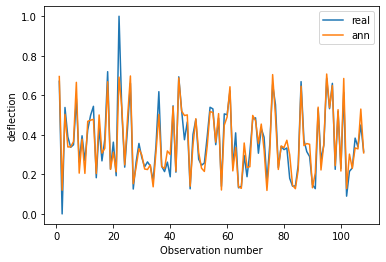

In [10]:
ann_mrr_op = list(regr_MRR.predict(X_train.to_numpy()))
real_mrr_op = list(Y_train.to_numpy())
x_mrr = list(np.arange(1,X_train.shape[0]+1))
fig5, ax5 = plt.subplots()
ax5.plot(x_mrr,real_mrr_op,label= "real")
ax5.plot(x_mrr,ann_mrr_op,label = "ann")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


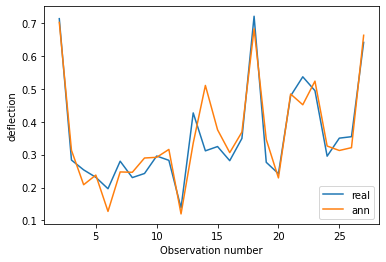

In [11]:
a_ = 1
b_ = X_test.shape[0]
b_ = b_+1
ann_mrr_op = list(regr_MRR.predict(X_test.to_numpy()))[a_:b_]
real_mrr_op = list(Y_test.to_numpy())[a_:b_]
x_mrr = list(np.arange(1,b_))[a_:b_]
fig5, ax5 = plt.subplots()
ax5.plot(x_mrr,real_mrr_op,label= "real")
ax5.plot(x_mrr,ann_mrr_op,label = "ann")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

In [12]:
MLPRegressor().fit(X_train2,Y2_train).score(X_test2,Y2_test)

0.6837697761489414

In [13]:
regr_RA = MLPRegressor(hidden_layer_sizes=(10,8),activation='relu',
                        alpha=0.0005,solver='lbfgs',max_iter=1000)

In [14]:
regr_RA.fit(X_train2,Y2_train)
regr_RA.score(X_test2,Y2_test)

0.828133863609679

It can seen that the test score is pretty low.Therefore, it can be concluded that the neural network is not able to find the actual relation between the input variables and surface roughnes.

### Performance of ANN for predicting RA

#### On train data

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


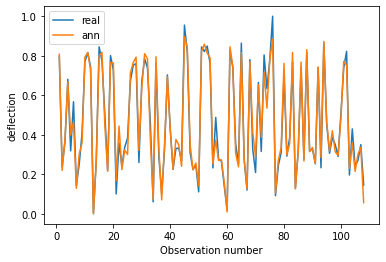

In [15]:
a_ = 1
b_ = X_train2.shape[0]
b_ = b_+1
ann_ra_op = list(regr_RA.predict(X_train2.to_numpy()))
real_ra_op = list(Y2_train.to_numpy())
x_ra = list(np.arange(1,b_))
fig5, ax5 = plt.subplots()
ax5.plot(x_ra,real_ra_op,label= "real")
ax5.plot(x_ra,ann_ra_op,label = "ann")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

#### On test data

c:\users\suryakant\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


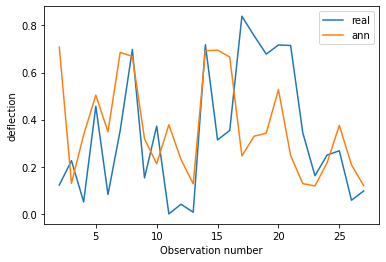

In [16]:
a_ = 1
b_ = X_test2.shape[0]
b_ = b_+1
ann_ra_op = list(regr_MRR.predict(X_test2.to_numpy()))[a_:b_]
real_ra_op = list(Y2_test.to_numpy())[a_:b_]
x_ra = list(np.arange(1,b_))[a_:b_]
fig5, ax5 = plt.subplots()
ax5.plot(x_ra,real_ra_op,label= "real")
ax5.plot(x_ra,ann_ra_op,label = "ann")
plt.xlabel('Observation number')
plt.ylabel('deflection')
plt.legend()
plt.show()

The neural network models are now saved in pickle file format.

In [17]:
import pickle
with open('../trained_models/ANN_MRR_sklearn.pkl','wb') as f:
    pickle.dump(regr_MRR,f)
with open('../trained_models/ANN_RA_sklearn.pkl','wb') as f:
    pickle.dump(regr_RA,f)